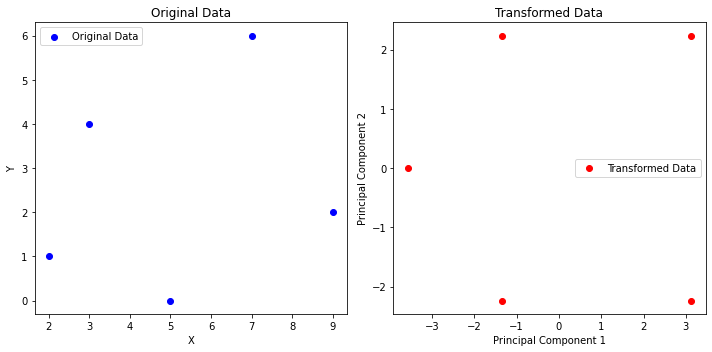

In [5]:
#Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
#Implement principal component analysis. Use this to obtain the feature in transformed
#2D feature space. Plot the scatter plot of data points in both the original as well as
#transformed domain.
import numpy as np
import matplotlib.pyplot as plt

data = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean = np.mean(data, axis=0)

cov_matrix = np.cov(data.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k = 2
top_eigenvectors = eigenvectors[:, :k]

transformed_data = np.dot(data - mean, top_eigenvectors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
plt.title('Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

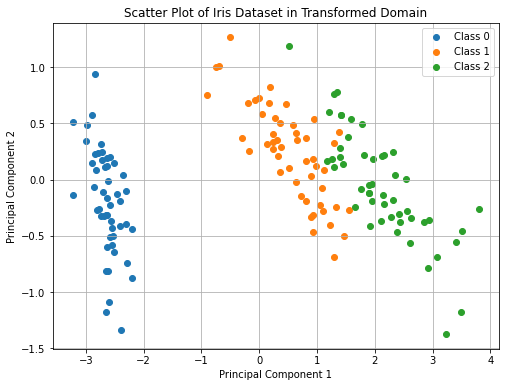

In [7]:
#Implement Principal Component Analysis Algorithm and use it to reduce dimensions
#of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed
#domain with different colour codes for samples belonging to different classes.
#Note: Develop the code without using library function ‘PCA’. Import linalg module from
#numpy to compute the eigen values and corresponding eigen vectors.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_normalized = X - np.mean(X, axis=0)

cov_matrix = np.cov(X_normalized.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

k = 2
top_eigenvectors = eigenvectors[:, :k]

transformed_data = np.dot(X_normalized, top_eigenvectors)
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(transformed_data[y == i, 0], transformed_data[y == i, 1], label=f'Class {i}')

plt.title('Scatter Plot of Iris Dataset in Transformed Domain')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()